In [17]:

from keras.preprocessing import image


import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import random

import keras

import numpy as np

# A library for data visualization
import matplotlib.pyplot as plt

# An advanced library for data visualization
import seaborn as sns

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model


In [54]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
base_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
base_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [56]:
# Load the saved model
base_model = load_model('my_trained_model8.h5')

1/1 [==============================] - 0s 54ms/step


C:\Users\Grego\AppData\Local\Temp\ipykernel_8600\2836886567.py:29: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Grego\AppData\Local\Temp\ipykernel_8600\2836886567.py:32: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


1/1 [==============================] - 0s 83ms/step


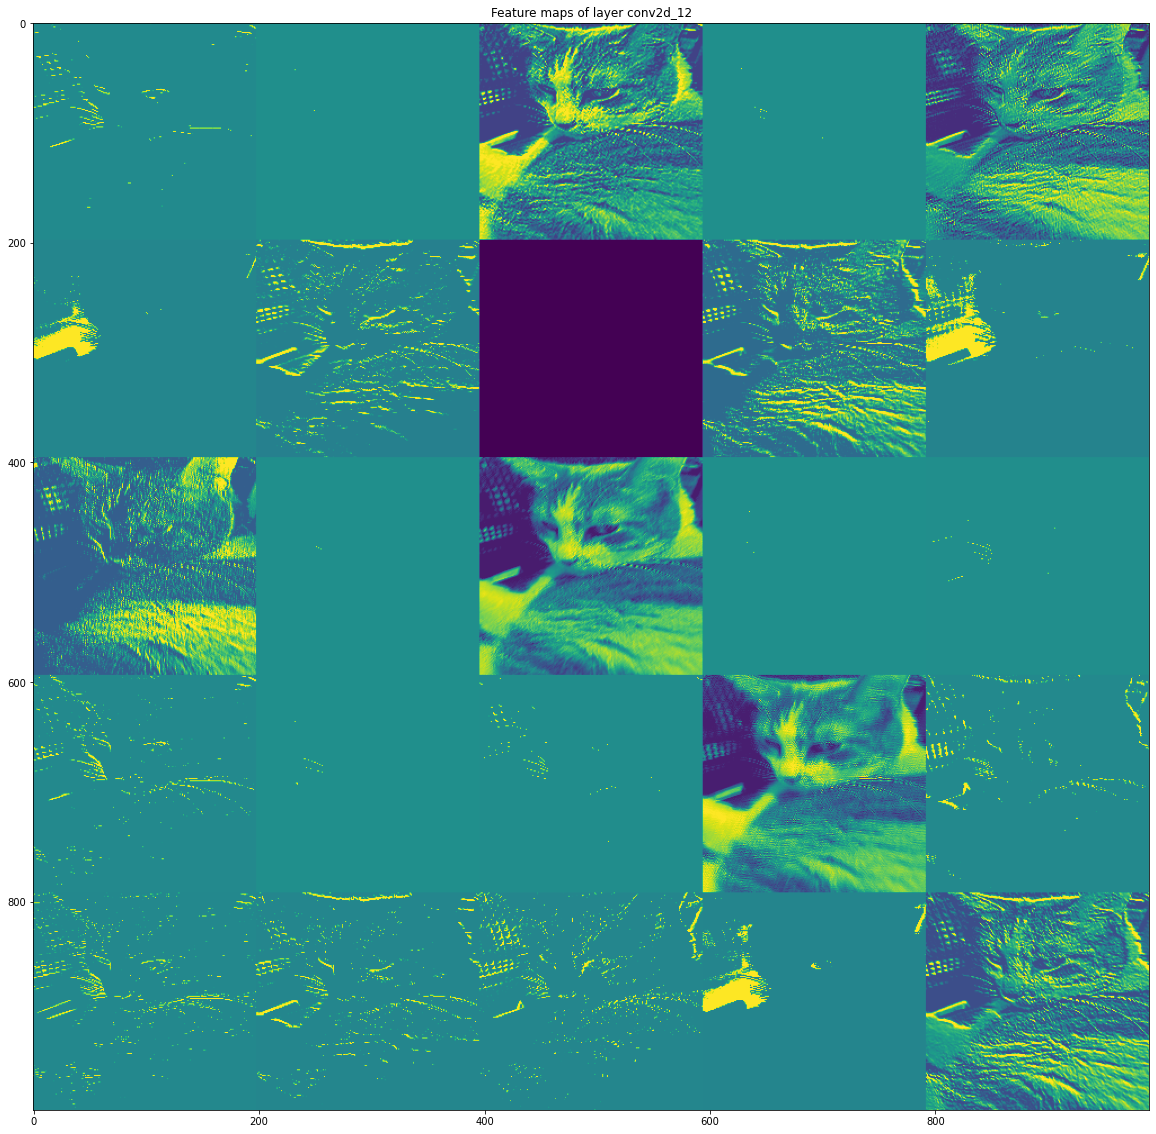

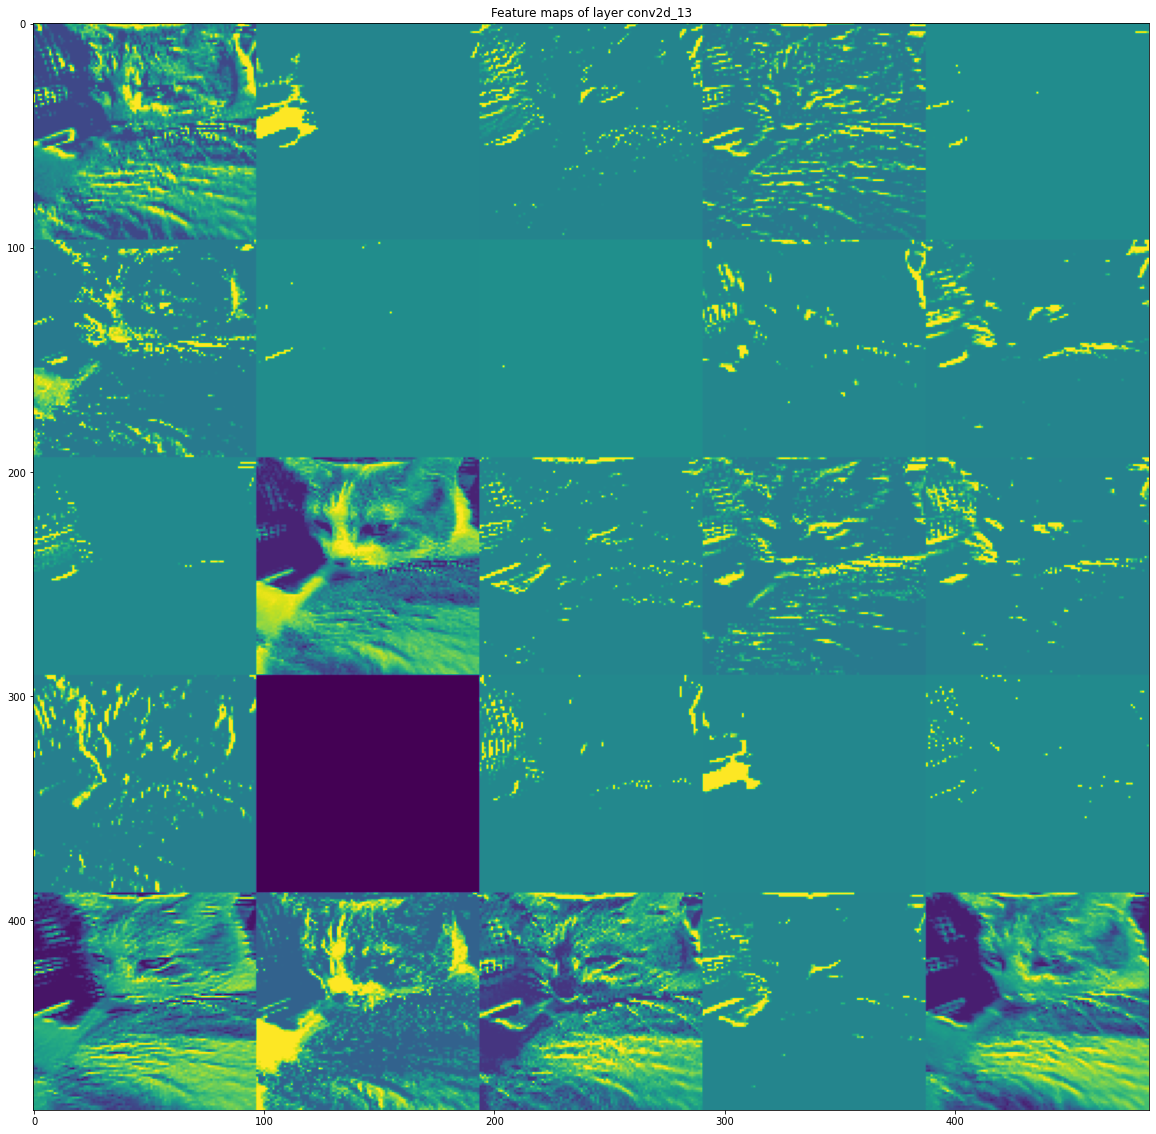

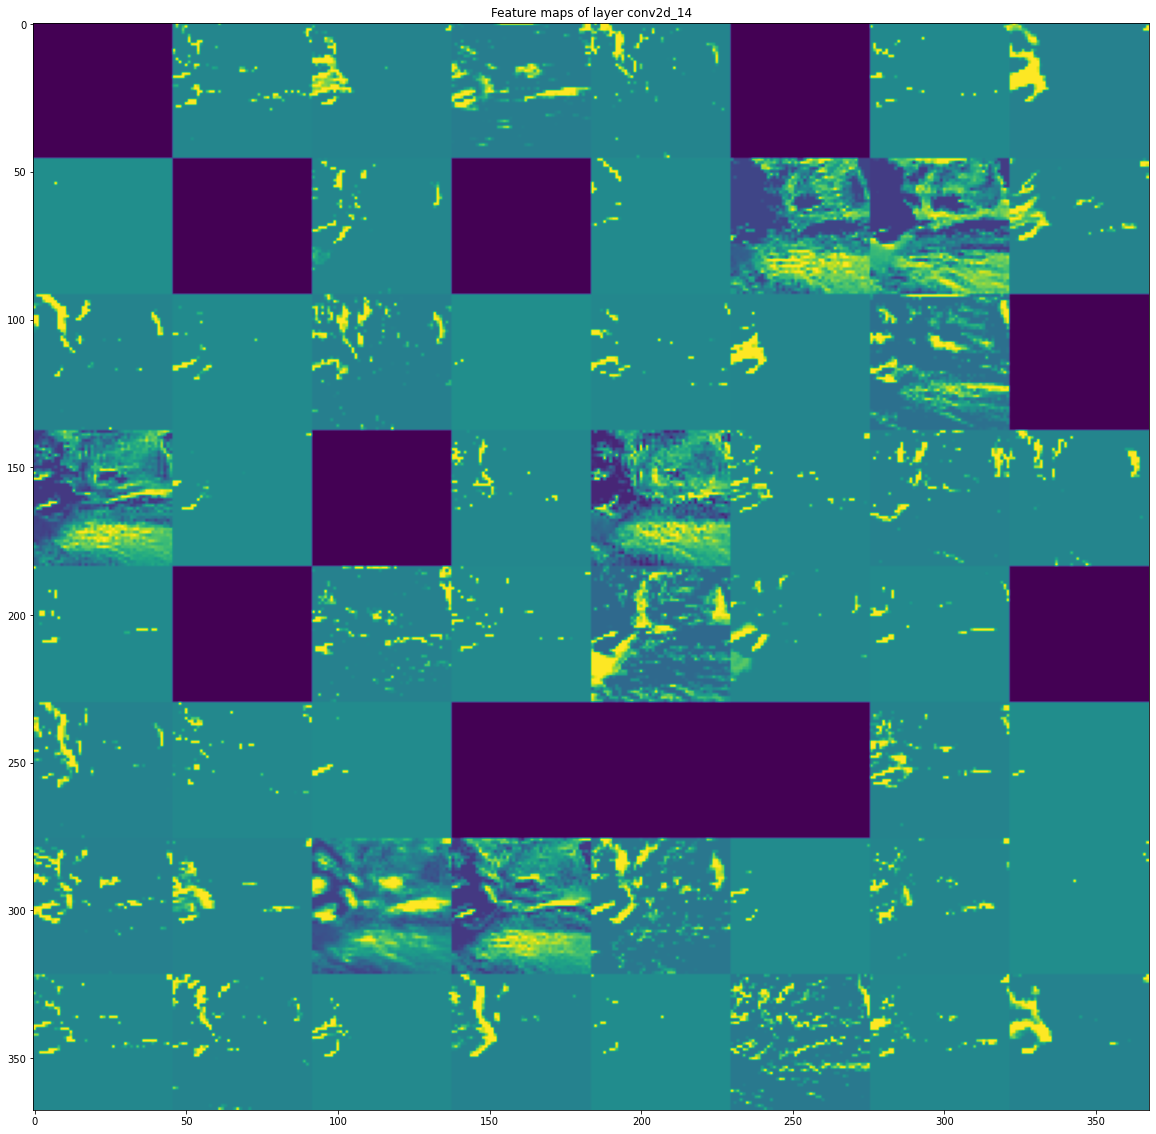

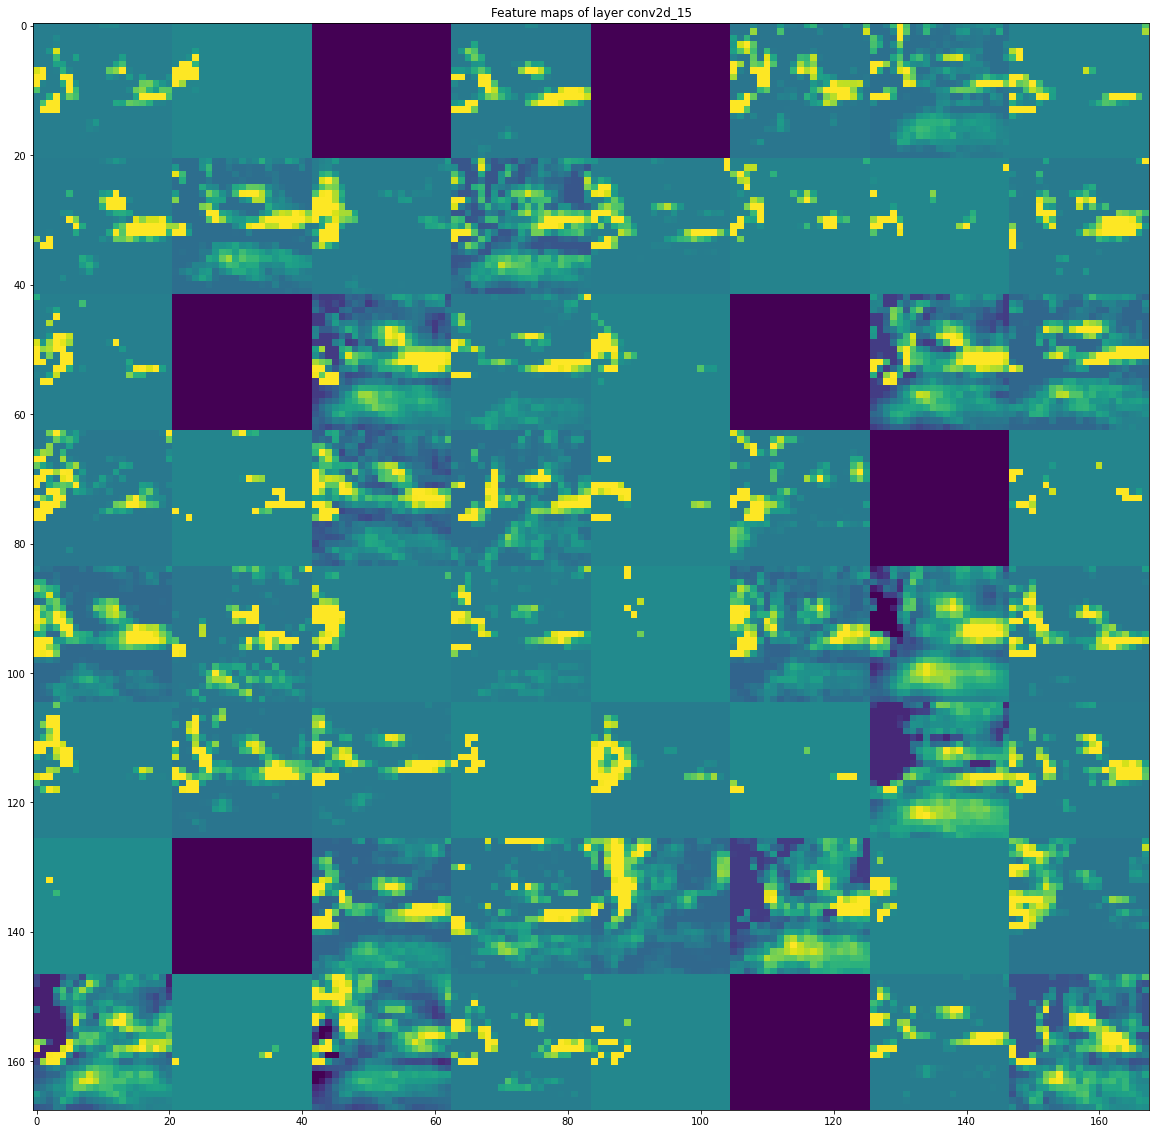

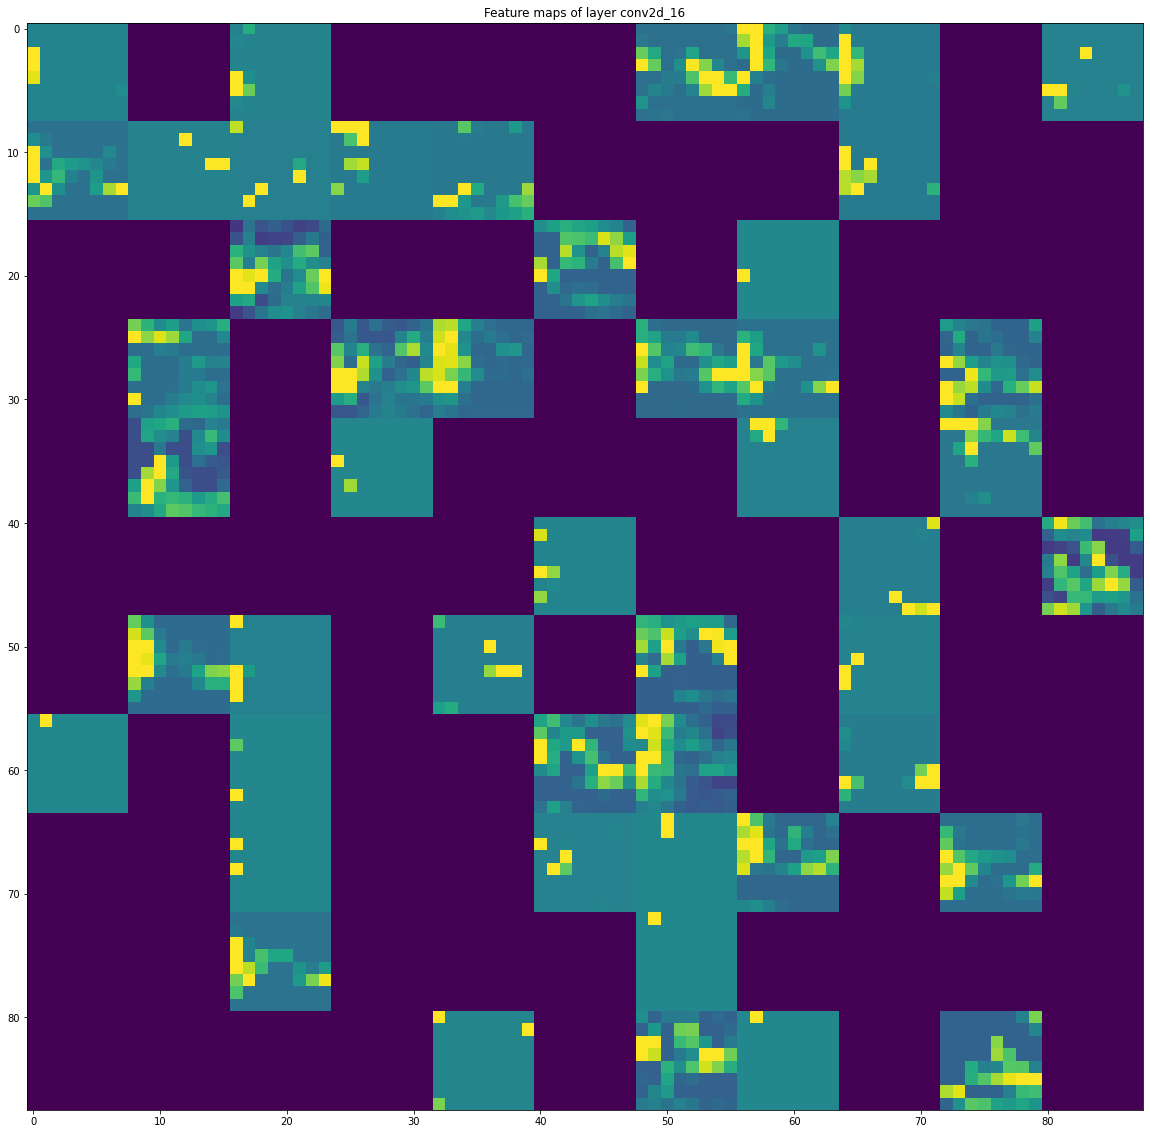

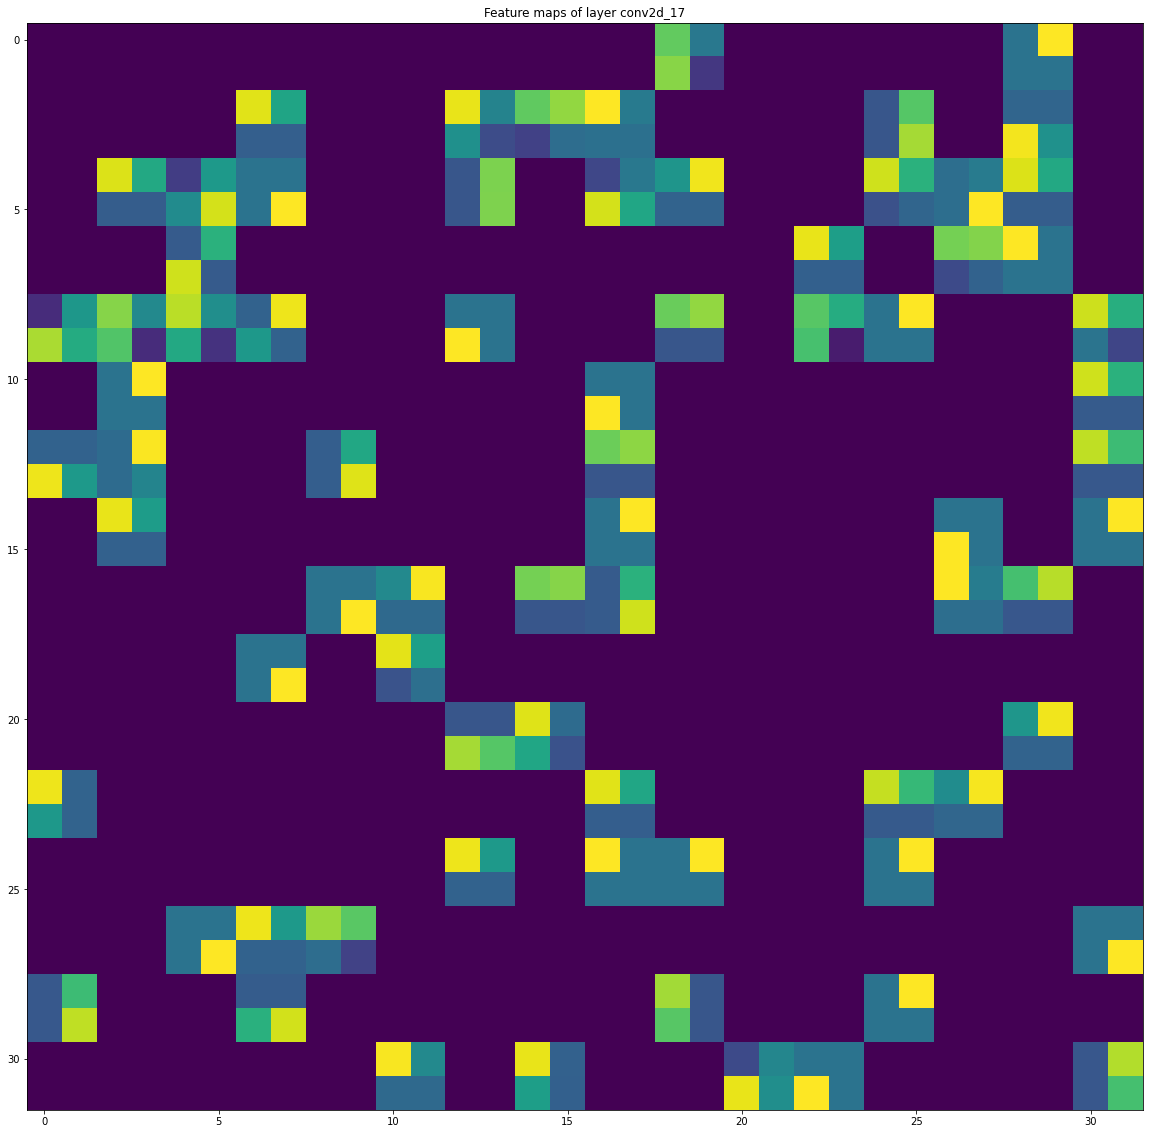

In [57]:

image_path = "test3.jpg"
img = image.load_img(image_path, target_size=(200, 200))
input_image = image.img_to_array(img)
input_image = np.expand_dims(input_image, axis=0)
input_image /= 255.0


# Extract all the convolutional layers from the model
conv_layers = [layer for layer in base_model.layers if 'conv' in layer.name]  # adjust if you have other naming conventions

# For each convolutional layer, create a model to get its output
for layer in conv_layers:
    intermediate_model = tf.keras.models.Model(inputs=base_model.input, outputs=layer.output)
    intermediate_prediction = intermediate_model.predict(input_image)
    
    # Now let's visualize the feature maps
    n_features = intermediate_prediction.shape[-1]  # Number of feature maps
    size = intermediate_prediction.shape[1]  # The feature map has shape (size, size)
    
    # We'll arrange the feature maps in a square shape (or as close to square as possible)
    display_grid = np.zeros((size * int(np.sqrt(n_features)), size * int(np.sqrt(n_features))))
    
    for i in range(int(np.sqrt(n_features))):
        for j in range(int(np.sqrt(n_features))):
            if i * int(np.sqrt(n_features)) + j < n_features:
                # Post-process the feature to make it visually palatable
                x = intermediate_prediction[0, :, :, i * int(np.sqrt(n_features)) + j]
                x -= x.mean()
                x /= x.std()
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                display_grid[i * size: (i + 1) * size, j * size: (j + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale * n_features))
    plt.title(f"Feature maps of layer {layer.name}")
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [29]:
# Define your data directory
data_dir = 'images/'

# Find the minimum number of images across all subdirectories
min_images = float('inf')
for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        min_images = min(min_images, num_images)

# Initialize lists to store images and labels
images = []
labels = []

# Loop through subdirectories (each subdirectory corresponds to a class)
for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        images_added = 0
        for img_filename in os.listdir(class_path):
            if images_added < min_images:  # Only load up to the minimum number
                img_path = os.path.join(class_path, img_filename)
                # Read the image and resize it to your desired size
                img = cv2.imread(img_path)
                img = cv2.resize(img, (200, 200))  # Adjust the size as needed
                
                # Convert BGR image to RGB
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                images.append(img)
                labels.append(class_dir)
                images_added += 1

# Convert the labels to numerical format
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.2, random_state=42)

In [32]:
# Normalizing the image pixels
x_train_normalized = x_train/255

x_test_normalized = x_test/255

In [33]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [11]:
def classify_cat_breed(image_path):
    # Load the image and preprocess itimg = image.load_img(image_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    

    # Predict the breed
    predictions = model.predict(img_array)
    breed_index = np.argmax(predictions)
    
    # Here, you might want to map breed_index to a string representation of the breed.
    # For this example, let's assume you have a list called 'breed_names'.
    breed_names = ['Abyssian', 'Munchkin', 'Persian', 'Toyger']  # Replace with your actual breed names
    breed_name = breed_names[breed_index]

    return breed_name


In [12]:
# Test the classifier
image_path = "test2.jpg"
print(f"The cat breed is: {classify_cat_breed(image_path)}")

1/1 [==============================] - 0s 206ms/step
The cat breed is: Munchkin


In [34]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [35]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model for your cats
model_4 = Sequential()

# Add the base model for transfer learning
model_4.add(base_model)

In [36]:
# Adding a fully connected dense layer with 256 neurons
model_4.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_4.add(LeakyReLU(0.1))

# Adding the output layer with 3 neurons and 'softmax' activation function (for a multi-class classification problem)
model_4.add(Dense(3, activation = 'softmax'))

In [37]:
# Compiling the model
model_4.compile(

    loss = 'categorical_crossentropy',

    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),

    metrics=['accuracy']
)

In [38]:
# Fitting the model
history_4 = model_4.fit(

            x_train_normalized, y_train_encoded,

            epochs = 25,

            validation_split = 0.2,

            shuffle = True,

            verbose = 1
)

Epoch 1/25
11/11 [==============================] - 2s 161ms/step - loss: 1.0923 - accuracy: 0.3712 - val_loss: 1.0958 - val_accuracy: 0.4024
Epoch 2/25
11/11 [==============================] - 1s 136ms/step - loss: 1.0708 - accuracy: 0.4448 - val_loss: 1.0957 - val_accuracy: 0.3902
Epoch 3/25
11/11 [==============================] - 1s 138ms/step - loss: 1.0634 - accuracy: 0.4233 - val_loss: 1.0900 - val_accuracy: 0.4146
Epoch 4/25
11/11 [==============================] - 1s 135ms/step - loss: 1.0575 - accuracy: 0.4479 - val_loss: 1.0876 - val_accuracy: 0.4268
Epoch 5/25
11/11 [==============================] - 1s 135ms/step - loss: 1.0532 - accuracy: 0.4724 - val_loss: 1.0815 - val_accuracy: 0.4268
Epoch 6/25
11/11 [==============================] - 1s 134ms/step - loss: 1.0484 - accuracy: 0.4601 - val_loss: 1.0874 - val_accuracy: 0.4024
Epoch 7/25
11/11 [==============================] - 1s 137ms/step - loss: 1.0440 - accuracy: 0.4479 - val_loss: 1.0862 - val_accuracy: 0.4024
Epoch 

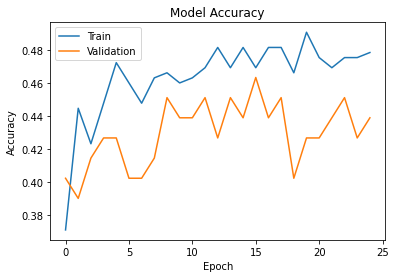

In [39]:
plt.plot(history_4.history['accuracy'])

plt.plot(history_4.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

1/1 [==============================] - 0s 82ms/step


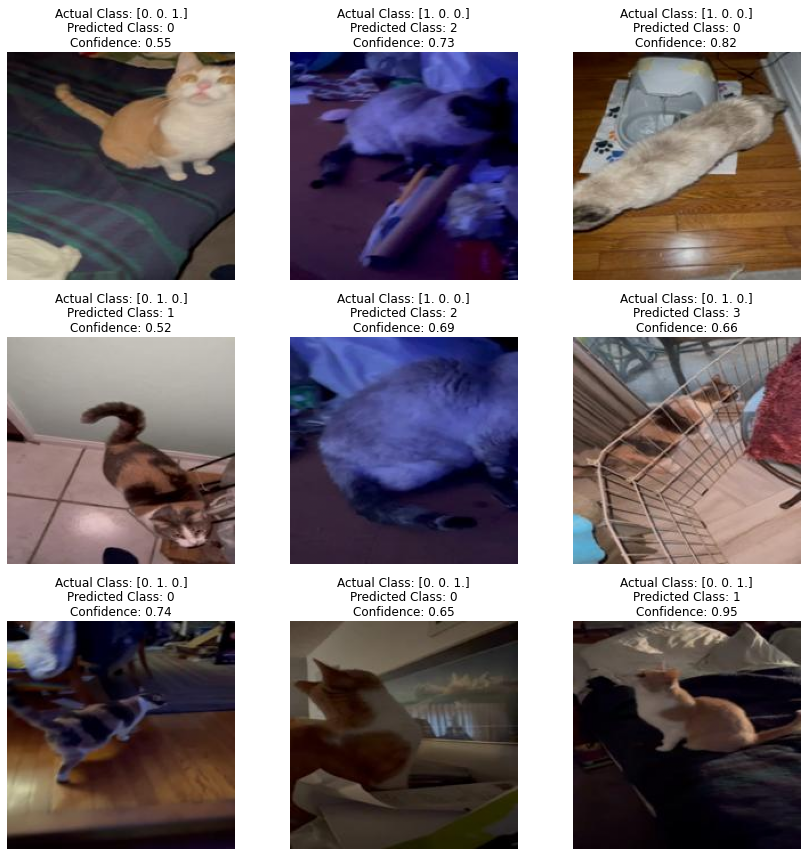

In [40]:
# Function to make predictions and display results
def predict_and_display(model, images, actual_labels):
    predictions = model.predict(images)
    
    # Get the predicted classes and their associated confidence scores
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)
    
    # Display the images, actual class, and predicted class (indices)
    num_images = len(images)
    
    plt.figure(figsize=(12, 12))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Actual Class: {actual_labels[i]}\nPredicted Class: {predicted_classes[i]}\nConfidence: {confidence_scores[i]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Randomly select 9 images from x_test for prediction
random_indices = np.random.choice(len(x_test), 9, replace=False)
random_images = x_test_normalized[random_indices]
actual_labels = y_test_encoded[random_indices]  # Actual class indices

# Make predictions and display the results
predict_and_display(loaded_model, random_images, actual_labels)